In [9]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [10]:
# 准备数据集
BATCH_SIZE = 64
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_dataset = datasets.MNIST(
    root="dataset",
    train=True,
    download=True,
    transform=transform
)
test_dataset = datasets.MNIST(
    root="dataset",
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(test_dataset,shuffle=False,batch_size=BATCH_SIZE)

In [11]:
class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.pooling = torch.nn.MaxPool2d(2)
        self.conv1 = torch.nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10,20,kernel_size=5)
        self.fc = torch.nn.Linear(320,10)
    def forward(self,x):
        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = x.view(batch_size,-1)
        x = self.fc(x)
        return x


In [12]:
model = CNN()
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model.to(device=device)
model

CNN(
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc): Linear(in_features=320, out_features=10, bias=True)
)

In [13]:
LR = 1e-3
EPOCH = 10
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=LR,momentum=0.5)

In [28]:
def train(epoch):
    running_loss = 0.0
    running_ = []
    for batch_idx, data in enumerate(train_loader):
        inputs, target = data
        inputs,target = inputs.to(device),target.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d,%.5d] loss:%.3f' % (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_.append(running_loss / 2000)
            running_loss = 0.0




In [23]:
def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, target = data
            inputs,target=inputs.to(device),target.to(device)

            outputs = model(inputs)
            _,predicted = torch.max(outputs.data,dim=1)
            total += target.size(0)
            correct += (predicted==target).sum().item()
    print('Accuracy on test set:%d %% [%d %d]' %(100*correct/total,correct,total))  

In [14]:
running_ = []
correct_ = []
for epoch in range(EPOCH):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader):
        inputs, target = data
        inputs,target = inputs.to(device),target.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d,%.5d] loss:%.3f' % (epoch + 1, batch_idx + 1, running_loss / 2000))
            running_.append(running_loss / 2000)
            running_loss = 0.0

            correct = 0
            total = 0
            with torch.no_grad():
                model.eval()
                for data in test_loader:
                    inputs, target = data
                    inputs,target=inputs.to(device),target.to(device)

                    outputs = model(inputs)
                    _,predicted = torch.max(outputs.data,dim=1)
                    total += target.size(0)
                    correct += (predicted==target).sum().item()
            model.train()
            correct_.append(correct/total)
            print('Accuracy on test set:%d %% [%d %d]' %(100*correct/total,correct,total))
            

[1,00300] loss:0.283
Accuracy on test set:78 % [7852 10000]
[1,00600] loss:0.117
Accuracy on test set:86 % [8601 10000]
[1,00900] loss:0.070
Accuracy on test set:89 % [8900 10000]
[2,00300] loss:0.058
Accuracy on test set:90 % [9044 10000]
[2,00600] loss:0.049
Accuracy on test set:91 % [9140 10000]
[2,00900] loss:0.046
Accuracy on test set:92 % [9205 10000]
[3,00300] loss:0.042
Accuracy on test set:92 % [9247 10000]
[3,00600] loss:0.039
Accuracy on test set:93 % [9321 10000]
[3,00900] loss:0.037
Accuracy on test set:93 % [9372 10000]
[4,00300] loss:0.033
Accuracy on test set:93 % [9398 10000]
[4,00600] loss:0.034
Accuracy on test set:94 % [9449 10000]
[4,00900] loss:0.030
Accuracy on test set:94 % [9433 10000]
[5,00300] loss:0.029
Accuracy on test set:95 % [9507 10000]
[5,00600] loss:0.028
Accuracy on test set:95 % [9522 10000]
[5,00900] loss:0.027
Accuracy on test set:95 % [9555 10000]
[6,00300] loss:0.026
Accuracy on test set:95 % [9574 10000]
[6,00600] loss:0.025
Accuracy on test se

In [21]:
loss = []
for i in range (len(running_)):
    loss.append(round(running_[i],4))


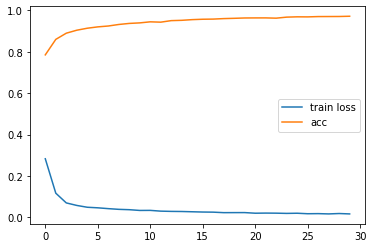

In [24]:
import matplotlib.pyplot as plt
plt.plot(loss,label="train loss")
plt.plot(correct_,label="acc")
plt.legend()